<a href="https://colab.research.google.com/github/diegoturenne/Application-Oriented-Deep-Learning-Course-2022-UU/blob/main/Copy_of_Exercise_7_2_CIFAR_10_DT_FD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tabulate import tabulate
layers = tf.keras.layers
import keras

The code block below defines a few helper functions to visualize the results. You do not need to touch them. 

In [ ]:
def plot_examples(X, Y, n=10):
    """ Plot the first n examples for each of the 10 classes in the CIFAR dataset X, Y """
    fig, axes = plt.subplots(n, 10, figsize=(10, n))
    for l in range(10):
        axes[0, l].set_title(cifar10_labels[l], fontsize="smaller")
        m = np.squeeze(Y) == l  # boolean mask: True for all images of label l
        for i in range(n):
            image = X[m][i].astype("uint8")  # imshow expects uint8
            ax = axes[i, l]
            ax.imshow(image, origin="upper")
            ax.set(xticks=[], yticks=[])
    return fig, ax


def plot_prediction(X, Y, Y_predict):
    """
    Plot image X along with predicted probabilities Y_predict.
    X: CIFAR image, shape = (32, 32, 3)
    Y: CIFAR label, one-hot encoded, shape = (10)
    Y_predict: predicted probabilities, shape = (10)
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # plot image
    ax1.imshow(X.astype("uint8"), origin="upper")
    ax1.set(xticks=[], yticks=[])

    # plot probabilities
    ax2.barh(np.arange(10), Y_predict, align="center")
    ax2.set(xlim=(0, 1), xlabel="Score", yticks=[])
    for i in range(10):
        c = "red" if (i == np.argmax(Y)) else "black"
        ax2.text(0.05, i, cifar10_labels[i].capitalize(), ha="left", va="center", color=c)



def plot_confusion(Y_true, Y_predict):
    """
    Plot confusion matrix
    Y_true:    array of true classifications (0-9), shape = (N)
    Y_predict: array of predicted classifications (0-9), shape = (N)
    """
    C = np.histogram2d(Y_true, Y_predict, bins=np.linspace(-0.5, 9.5, 11))[0]
    Cn = C / np.sum(C, axis=1)

    fig = plt.figure()
    plt.imshow(Cn, interpolation="nearest", vmin=0, vmax=1, cmap=plt.cm.YlGnBu)
    plt.colorbar()
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.xticks(range(10), cifar10_labels, rotation="vertical")
    plt.yticks(range(10), cifar10_labels)
    for x in range(10):
        for y in range(10):
            plt.annotate("%i" % C[x, y], xy=(y, x), ha="center", va="center")



First we load and preprocess CIFAR-10 data. The imagages are 32x32 pixels and have three color channels (red, green blue). 

In [ ]:

# X: images, Y: labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("images, shape = ", x_train.shape)
print("labels, shape = ", y_train.shape)

cifar10_labels = np.array([                                                                                                                                                                       
    'airplane',                                                                                                                                                                                   
    'automobile',                                                                                                                                                                                 
    'bird',                                                                                                                                                                                       
    'cat',                                                                                                                                                                                        
    'deer',                                                                                                                                                                                       
    'dog',                                                                                                                                                                                        
    'frog',                                                                                                                                                                                       
    'horse',                                                                                                                                                                                      
    'ship',                                                                                                                                                                                       
    'truck'])  

170498071/170498071 [==============================] - 2s 0us/step
images, shape =  (50000, 32, 32, 3)
labels, shape =  (50000, 1)


(<Figure size 720x720 with 100 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff68320ac10>)

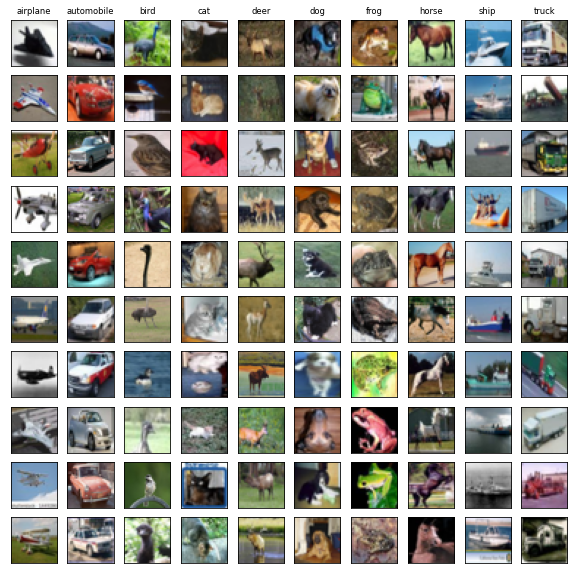

In [ ]:
# Hint: To plot example images, you can use the plot examples function
plot_examples(x_train, y_train)

In [ ]:
# convert labels ("0"-"9") to one-hot encodings, "0" = (1, 0, ... 0) and so on
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)[:8000]
y_valid_onehot = tf.keras.utils.to_categorical(y_test, 10)[8000:]


x_valid = x_test[8000:]/255
x_test = x_test[:8000]/255
x_train = x_train/255

# Hint: use 20% of the training data for validation
# isnt it already set when you declared y_valid_oneshot though ? 

In [ ]:
model = tf.keras.models.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10),
    layers.Activation('softmax')])  # softmax actication to transform output into probabiliites

We start with a fully connected network

In [ ]:
# ----------------------------------------------------------
# Define model
# ----------------------------------------------------------
model = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=(32, 32, 3)),  # (32,32,3) --> (3072)
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),

    layers.Dense(10),
    layers.Activation('softmax')
        # this time the flatten operation is directly integrated into the network 
        # structure so that we can use the same input data later for a convolutional neural network. 
        # Hint: remember that the output layer should have 10 nodes with a softmax activation
    ],
    name="nn",
)

print(model.summary())

Model: "nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable pa

In [ ]:
# ----------------------------------------------------------
# Training
# ----------------------------------------------------------
model.compile(
    loss='categorical_crossentropy',  # the recommended loss for a classification task is 'categorical_crossentropy' (see lecture for details)
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']) 

model.fit(
    x_train, y_train_onehot,
    validation_data=(x_valid, y_valid_onehot),

    batch_size=64,
    epochs=20, # train at least for 20 epochs
    verbose=2,
    # validation_data=(x_valid, y_valid_onehot),
    callbacks=[tf.keras.callbacks.CSVLogger("history_{}.csv".format(model.name))],
)

Epoch 1/20
782/782 - 6s - loss: 2.0529 - accuracy: 0.2321 - val_loss: 1.8739 - val_accuracy: 0.3175 - 6s/epoch - 7ms/step
Epoch 2/20
782/782 - 4s - loss: 1.9525 - accuracy: 0.2754 - val_loss: 1.8748 - val_accuracy: 0.3320 - 4s/epoch - 5ms/step
Epoch 3/20
782/782 - 2s - loss: 1.9193 - accuracy: 0.2887 - val_loss: 1.8313 - val_accuracy: 0.3470 - 2s/epoch - 3ms/step
Epoch 4/20
782/782 - 2s - loss: 1.8926 - accuracy: 0.3006 - val_loss: 1.8329 - val_accuracy: 0.3385 - 2s/epoch - 3ms/step
Epoch 5/20
782/782 - 2s - loss: 1.8721 - accuracy: 0.3094 - val_loss: 1.8103 - val_accuracy: 0.3620 - 2s/epoch - 3ms/step
Epoch 6/20
782/782 - 2s - loss: 1.8665 - accuracy: 0.3112 - val_loss: 1.8468 - val_accuracy: 0.3630 - 2s/epoch - 3ms/step
Epoch 7/20
782/782 - 2s - loss: 1.8479 - accuracy: 0.3219 - val_loss: 1.8119 - val_accuracy: 0.3635 - 2s/epoch - 3ms/step
Epoch 8/20
782/782 - 2s - loss: 1.8445 - accuracy: 0.3229 - val_loss: 1.8113 - val_accuracy: 0.3620 - 2s/epoch - 3ms/step
Epoch 9/20
782/782 - 2s 

In [ ]:

# # ------------------------
# # ---     Plotting     ---
# # ------------------------

# # plot training history
# history = np.genfromtxt(f"history_{model.name}.csv", delimiter=",", names=True)

# fig, ax = plt.subplots(1)
# ax.plot(history["epoch"], history["train_loss"], label="training")
# ax.plot(history["epoch"], history["val_loss"], label="validation")
# ax.legend()
# ax.set(xlabel="epoch", ylabel="loss")

# fig, ax = plt.subplots(1)
# ax.plot(history["epoch"], history["train_acc"], label="training")
# ax.plot(history["epoch"], history["val_accuracy"], label="validation")
# ax.legend()
# ax.set(xlabel="epoch", ylabel="accuracy")

63/63 [==============================] - 0s 2ms/step


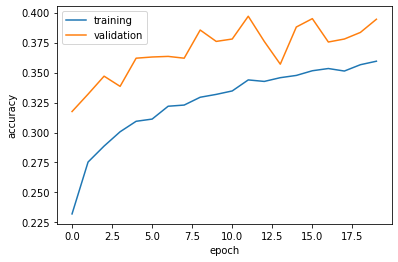

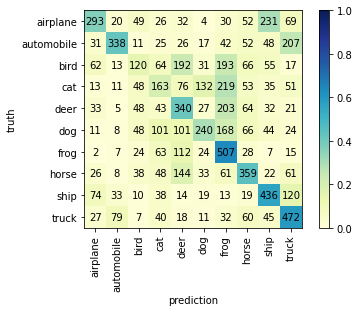

In [ ]:
# ----------------------------------------------------------
# Plots
# ----------------------------------------------------------
# training curves
history = np.genfromtxt("history_{}.csv".format(model.name), delimiter=",", names=True)

fig, ax = plt.subplots(1)
ax.plot(history["epoch"], history["accuracy"], label="training")
ax.plot(history["epoch"], history["val_accuracy"], label="validation")
ax.legend()
ax.set(xlabel="epoch", ylabel="accuracy")


# Hint: this is how you can plot the confusion matrix. 
# calculate predictions for test set
y_predict = model.predict(x_test, batch_size=128)

# convert back to class labels (0-9)
y_predict_cl = np.argmax(y_predict, axis=1)
y_test_cl = np.argmax(y_test_onehot, axis=1)

# plot confusion matrix
plot_confusion(y_test_cl, y_predict_cl)

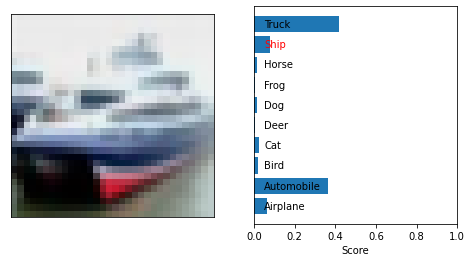

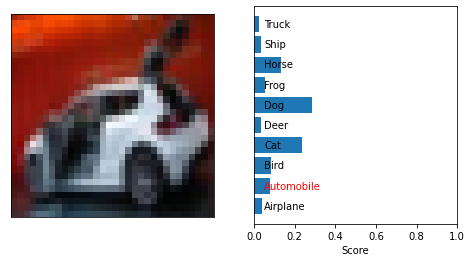

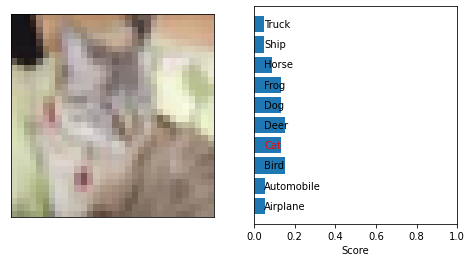

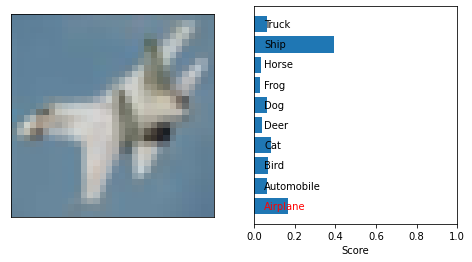

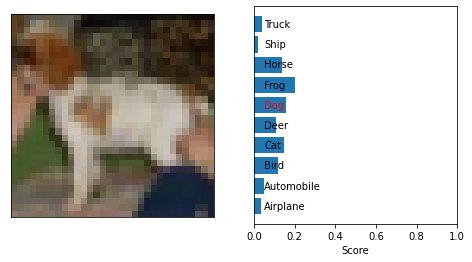

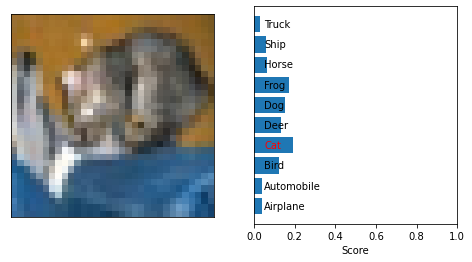

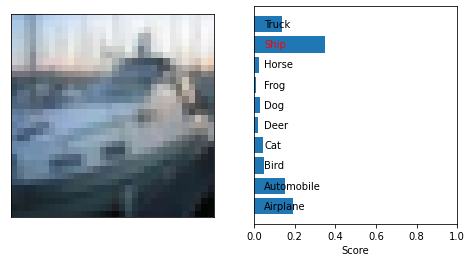

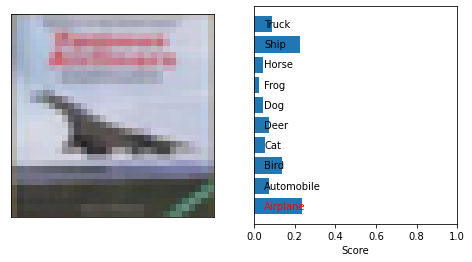

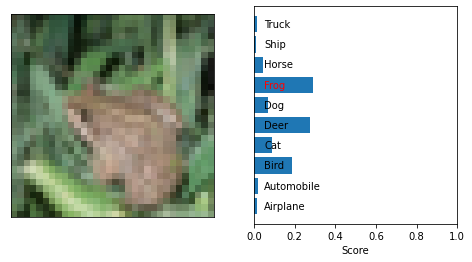

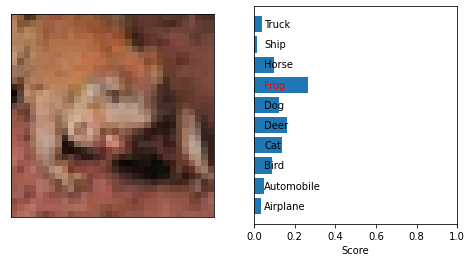

In [ ]:
# Task: plot a few examples of correctly and incorrectly classified images. 
# Hint: First find the indices of correctly and incorrectly classified images:
m = y_predict_cl == y_test_cl
i0 = np.arange(8000)[~m]  # misclassified images
i1 = np.arange(8000)[m]  # correctly classified images

# original (unnormalized) test images
x_test = x_test[:8000]

# Hint: Now you can use the `plot_prediction` function to plot the images:
# plot first 5 false classifications
for i in i0[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])

# plot first 5 True classifications
for i in i1[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])

In [ ]:
layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3))


**CNN**
In the second part of this exercise, classify the images with a CNN.


In [ ]:
# Hint: this code snipped shows how to define convolution and maxpooling layers. For more information see 
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/

# model taken from:
#https://www.researchgate.net/publication/326816043_FAWCA_A_Flexible-greedy_Approach_to_find_Well-tuned_CNN_Architecture_for_Image_Recognition_Problem/figures?lo=1

reg_strategy = keras.regularizers.l2(l2=0.001)


model = tf.keras.models.Sequential(
    [
        layers.Conv2D(96, kernel_size=(5, 5), padding="same", 
                      kernel_regularizer=reg_strategy, 
                      activation="relu", input_shape=(32, 32, 3)),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(80, kernel_size=(5, 5), padding="same",
                      kernel_regularizer=reg_strategy, activation="relu", ),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(96, kernel_size=(5, 5), padding="same", 
                      kernel_regularizer=reg_strategy, 
                      activation="relu", ),
        layers.Dropout(0.2),
     
        layers.Conv2D(64, kernel_size=(5, 5), padding="same", 
                      kernel_regularizer=reg_strategy, 
                      activation="relu", ),
        layers.Dropout(0.2),
       
        # Dense networks
        layers.Flatten(),  
        layers.Dense(256, activation="relu", kernel_regularizer=reg_strategy),
        layers.Dropout(0.4),
        layers.Dense(10),
        layers.Activation('softmax')
    ],
    name="cnn",
)

print(model.summary())

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        7296      
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 96)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 80)        192080    
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 80)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 80)         0         
 2D)                                                           

In [ ]:
# ----------------------------------------------------------
# Training
# ----------------------------------------------------------
model.compile(
    loss='categorical_crossentropy',  # the recommended loss for a classification task is 'categorical_crossentropy' (see lecture for details)
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']) 

In [ ]:



model.fit(
    x_train, y_train_onehot,
    validation_data=(x_valid, y_valid_onehot),
    batch_size=128,
    epochs=60,
    callbacks=[tf.keras.callbacks.CSVLogger("history_{}.csv".format(model.name))],
)

Epoch 1/60
391/391 [==============================] - 11s 22ms/step - loss: 1.9040 - accuracy: 0.3476 - val_loss: 1.5724 - val_accuracy: 0.4675
Epoch 2/60
391/391 [==============================] - 8s 21ms/step - loss: 1.5201 - accuracy: 0.4844 - val_loss: 1.4474 - val_accuracy: 0.5410
Epoch 3/60
391/391 [==============================] - 8s 22ms/step - loss: 1.3830 - accuracy: 0.5488 - val_loss: 1.3612 - val_accuracy: 0.5615
Epoch 4/60
391/391 [==============================] - 8s 21ms/step - loss: 1.2868 - accuracy: 0.5943 - val_loss: 1.2409 - val_accuracy: 0.6075
Epoch 5/60
391/391 [==============================] - 8s 21ms/step - loss: 1.2051 - accuracy: 0.6320 - val_loss: 1.2959 - val_accuracy: 0.6050
Epoch 6/60
391/391 [==============================] - 8s 21ms/step - loss: 1.1666 - accuracy: 0.6486 - val_loss: 1.2467 - val_accuracy: 0.6250
Epoch 7/60
391/391 [==============================] - 8s 21ms/step - loss: 1.1268 - accuracy: 0.6692 - val_loss: 1.1812 - val_accuracy: 0.651

In [ ]:
#######################################################
##    got 81.68% for the trainnig set 
##    got 76.40% for the validation dataset
#######################################################

63/63 [==============================] - 1s 9ms/step


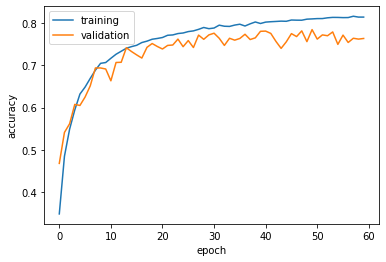

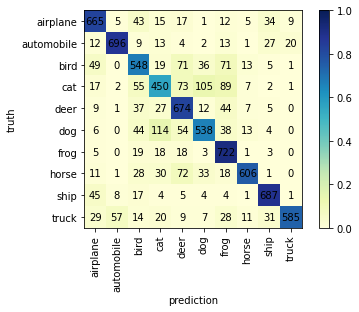

In [ ]:
# ----------------------------------------------------------
# Plots
# ----------------------------------------------------------
# training curves
history = np.genfromtxt("history_{}.csv".format(model.name), delimiter=",", names=True)

fig, ax = plt.subplots(1)
ax.plot(history["epoch"], history["accuracy"], label="training")
ax.plot(history["epoch"], history["val_accuracy"], label="validation")
ax.legend()
ax.set(xlabel="epoch", ylabel="accuracy")


# Hint: this is how you can plot the confusion matrix. 
# calculate predictions for test set
y_predict = model.predict(x_test, batch_size=128)

# convert back to class labels (0-9)
y_predict_cl = np.argmax(y_predict, axis=1)
y_test_cl = np.argmax(y_test_onehot, axis=1)

# plot confusion matrix
plot_confusion(y_test_cl, y_predict_cl)

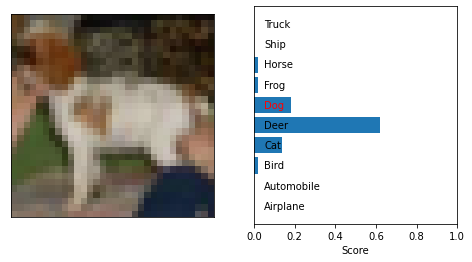

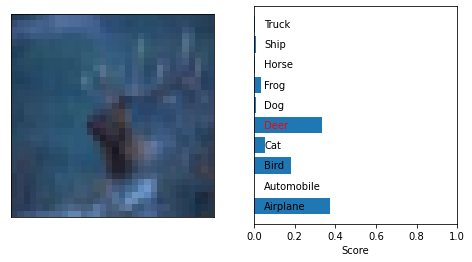

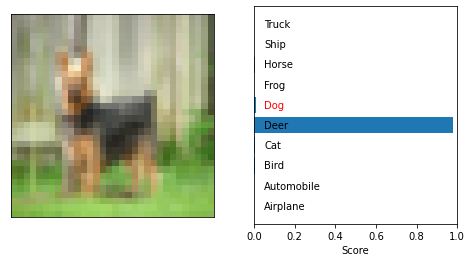

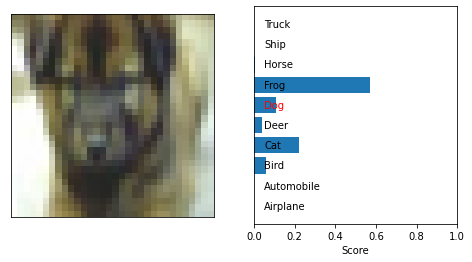

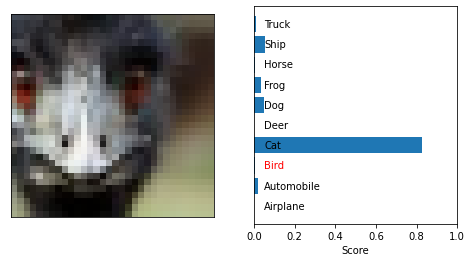

In [ ]:
# Task: plot a few examples of correctly and incorrectly classified images. 
# Hint: First find the indices of correctly and incorrectly classified images:
m = y_predict_cl == y_test_cl
i0 = np.arange(8000)[~m]  # misclassified images
i1 = np.arange(8000)[m]  # correctly classified images

# original (unnormalized) test images
x_test = x_test[:8000]

# plot first 5 false classifications
for i in i0[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])

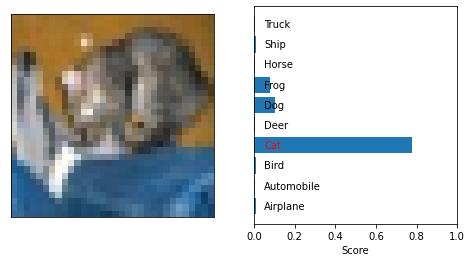

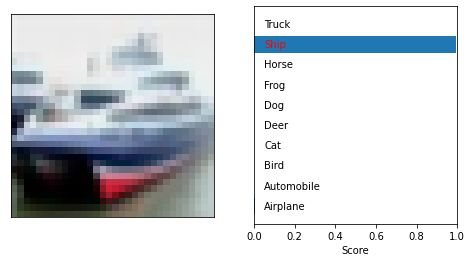

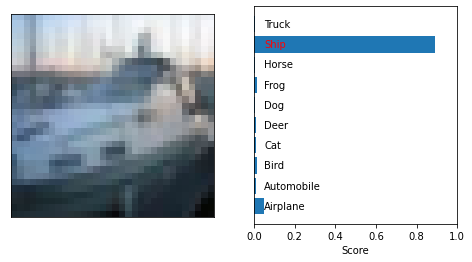

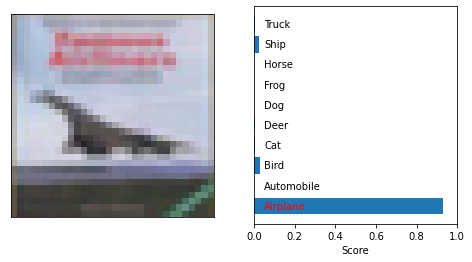

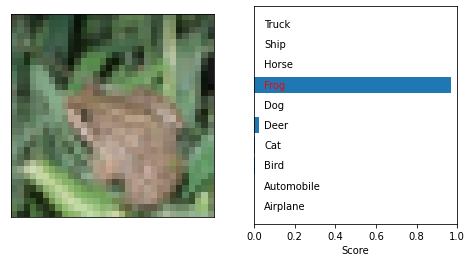

In [ ]:
# plot first 5 True classifications
for i in i1[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])